In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['kc_house_data.csv']


In [2]:
my_data = pd.read_csv("../input/kc_house_data.csv")
my_data.isna().sum()
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [3]:
data = my_data

print(len(data["id"].unique()))
data.shape

21436


(21613, 21)

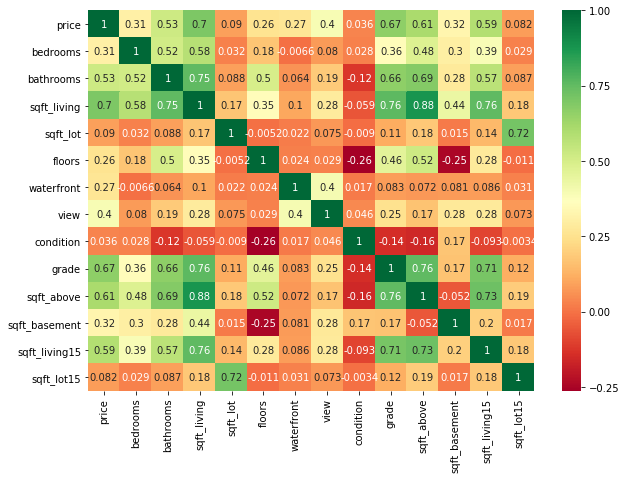

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['price', 'bedrooms','bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

sns.heatmap(data[cols].corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

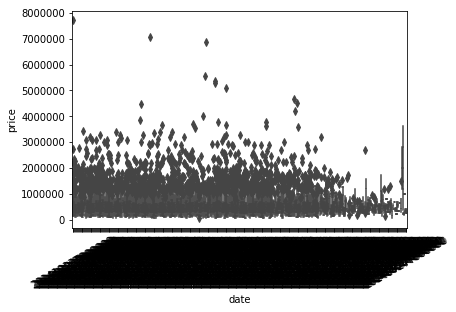

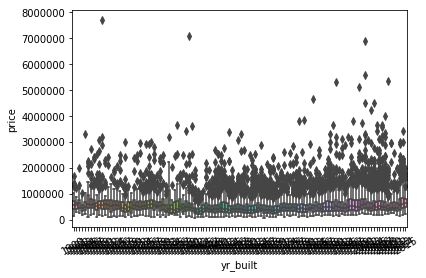

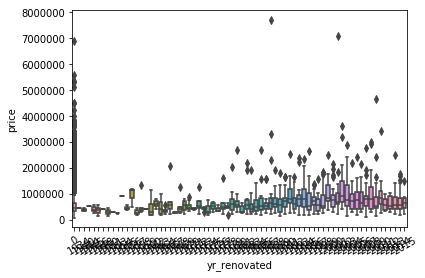

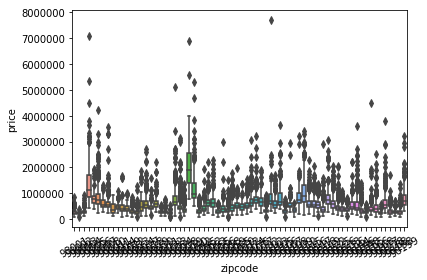

In [5]:
cate = [ "date", "yr_built","yr_renovated", "zipcode"]
for i in cate:
    ax = sns.boxplot(x=i, y="price", data=data)


    # Change the orientation of X axis Labels
    plt.xticks(rotation=30)

    # setting space between each box plot
    plt.subplots_adjust(hspace=0.8)

    fig = plt.gcf()

    # displaying the final output graph
    plt.show()

In [6]:
data["yr_built"].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [7]:
from sklearn.preprocessing import LabelBinarizer
cols_x = ['price', 'bedrooms','bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']
cols_y = ['price']

data = data.dropna()
data = data.reset_index(drop=True)

x = data[cols_x]
Y = data[cols_y]

lb = LabelBinarizer()
lb_results = lb.fit_transform(data["yr_built"])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
x = x.join(lb_results_df)

lb_results = lb.fit_transform(data["zipcode"])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
x = x.join(lb_results_df)

# lb_results = lb.fit_transform(data["yr_renovated"])
# lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
# x = x.join(lb_results_df)

In [8]:
x.keys()

Index([      'price',    'bedrooms',   'bathrooms', 'sqft_living',
          'sqft_lot',      'floors',  'waterfront',        'view',
             'grade',  'sqft_above',
       ...
               98146,         98148,         98155,         98166,
               98168,         98177,         98178,         98188,
               98198,         98199],
      dtype='object', length=198)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn import ensemble
from sklearn import metrics
import xgboost as xgb
from sklearn import linear_model
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.30, random_state=0)
model = RandomForestRegressor()
# model = linear_model.LinearRegression()
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train.values)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train.values)
X_test = scaler.transform(X_test.values)


params = {
    'max_depth': 6, 
    'n_estimators': 800, 
    'subsample': 0.95, 
    'colsample_bytree': 0.3, 
    'learning_rate': 0.05, 
    'reg_alpha': 0.1
}


model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
ypred_train = model.predict(X_train)


print("Mean Absoulte error w.r.t pred :", metrics.mean_absolute_error(y_test, ypred))
print("MSE Test                       :", metrics.mean_squared_error(y_test, ypred))
print("MSE Train                      :", metrics.mean_squared_error(y_train, ypred_train))
print("Mean Absoulte error w.r.t train:", metrics.mean_absolute_error(y_train, ypred_train))
print("R square score                 :", metrics.r2_score(y_test, ypred) )

[09:06:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absoulte error w.r.t pred : 13688.706451698412
MSE Test                       : 1669354509.3041642
MSE Train                      : 67218965.06594115
Mean Absoulte error w.r.t train: 6096.230015615705
R square score                 : 0.9878408421658896


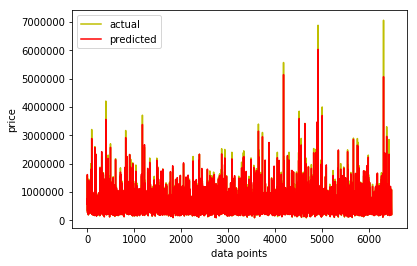

In [10]:
plt.xlabel('data points')
plt.ylabel('price')
plt.plot(y_test.values, 'y', label='actual')
plt.plot(ypred, 'r', label='predicted')
plt.legend()
fig = plt.gcf()
plt.show()